# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv',encoding="ISO-8859-1")
data.head()

C:\Users\onero\AppData\Local\Temp\ipykernel_8832\1071361731.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv',encoding="ISO-8859-1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Clean Data

In [4]:
data.drop(['stn_code', 'sampling_date', 'agency','location_monitoring_station'], axis=1, inplace=True)
data.reset_index(drop=True)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data["type"].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [6]:
cleaning_map = {
    'Residential, Rural and other Areas': 'Residential',
    'Residential and others': 'Residential',
    'RIRUO': 'Residential',
    'Industrial Area': 'Industrial',
    'Industrial Areas': 'Industrial',
    'Sensitive Area': 'Sensitive',
    'Sensitive Areas': 'Sensitive'
}

data['type'] = data['type'].replace(cleaning_map)

print(data)

                              state   location         type   so2   no2  \
0                    Andhra Pradesh  Hyderabad  Residential   4.8  17.4   
1                    Andhra Pradesh  Hyderabad   Industrial   3.1   7.0   
2                    Andhra Pradesh  Hyderabad  Residential   6.2  28.5   
3                    Andhra Pradesh  Hyderabad  Residential   6.3  14.7   
4                    Andhra Pradesh  Hyderabad   Industrial   4.7   7.5   
...                             ...        ...          ...   ...   ...   
435737                  West Bengal   ULUBERIA  Residential  22.0  50.0   
435738                  West Bengal   ULUBERIA  Residential  20.0  46.0   
435739  andaman-and-nicobar-islands        NaN          NaN   NaN   NaN   
435740                  Lakshadweep        NaN          NaN   NaN   NaN   
435741                      Tripura        NaN          NaN   NaN   NaN   

         rspm  spm  pm2_5        date  
0         NaN  NaN    NaN  1990-02-01  
1         NaN  NaN 

In [7]:
data.drop(index=[435739,435740,435741],inplace=True)

In [8]:
columns_to_fill = ['so2', 'no2','rspm','spm','pm2_5']  # Specify the columns you want to fill

# Fill NaN values in the specified columns with their respective means
for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].mean())

In [9]:
data.dropna(inplace=True)
data.head()
data.reset_index(drop=True)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,108.832784,220.78348,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,108.832784,220.78348,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,108.832784,220.78348,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...
430340,West Bengal,ULUBERIA,Residential,20.0,44.0,148.000000,220.78348,40.791467,2015-12-15
430341,West Bengal,ULUBERIA,Residential,17.0,44.0,131.000000,220.78348,40.791467,2015-12-18
430342,West Bengal,ULUBERIA,Residential,18.0,45.0,140.000000,220.78348,40.791467,2015-12-21
430343,West Bengal,ULUBERIA,Residential,22.0,50.0,143.000000,220.78348,40.791467,2015-12-24


In [10]:
data.to_csv("clean_data.csv",index=False)

# Calculate SI

In [23]:
data = pd.read_csv("clean_data.csv")
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [24]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [25]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()

,rspm,rpi
430340,148.0,122.666667
430341,131.0,117.000000
430342,140.0,120.000000
430343,143.0,121.000000
430344,171.0,130.333333


In [26]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,spm,spi
430340,220.78348,180.52232
430341,220.78348,180.52232
430342,220.78348,180.52232
430343,220.78348,180.52232
430344,220.78348,180.52232


In [27]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['date','state','si','ni','rpi','spi','AQI']]
df.head()

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,1990-02-01,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,1990-02-01,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,1990-03-01,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,1990-03-01,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


In [28]:
df.state.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal'], dtype=object)

In [29]:
df.head()

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,1990-02-01,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,1990-02-01,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,1990-03-01,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,1990-03-01,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


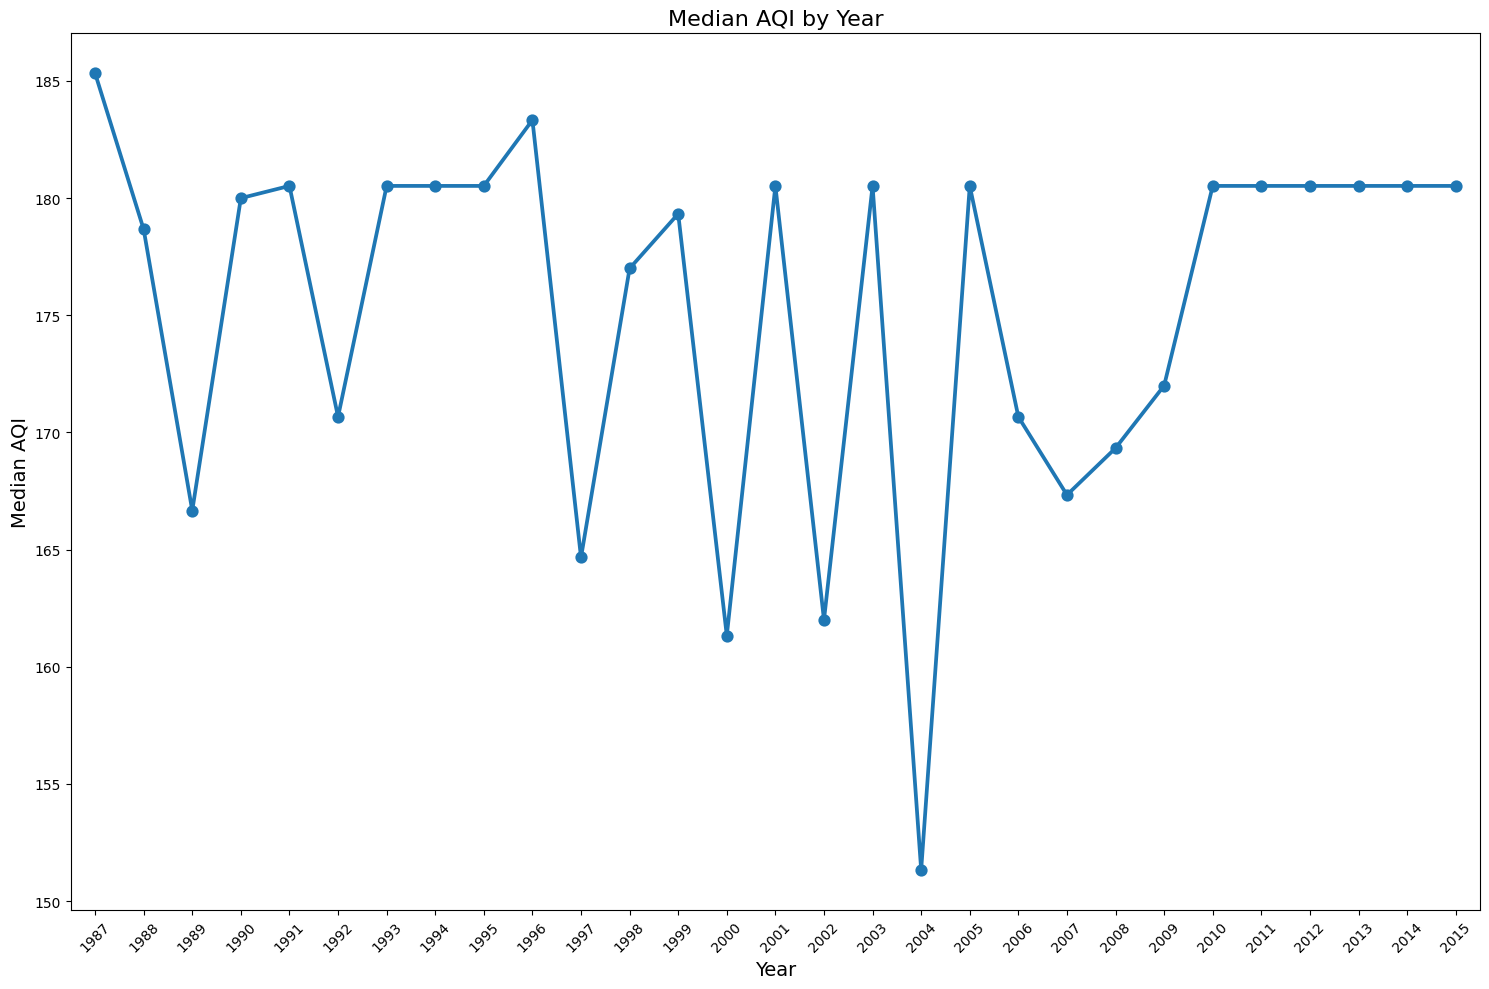

In [30]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce')

# Extract the year from the date column
data['year'] = data['date'].dt.year

# Filter rows where year is valid (non-NaN)
data = data[data['year'].notna()]

# Convert 'AQI' to numeric, coercing invalid values to NaN
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Drop rows with NaN in 'AQI' column
data = data.dropna(subset=['AQI'])

# Ensure 'AQI' is a numeric type
data['AQI'] = data['AQI'].astype(float)

# Group by 'year' and calculate median for numeric columns
df = data[['AQI', 'year']].groupby('year').median().reset_index()

# Sort by year in descending order
df = df.sort_values(by='year', ascending=False)

# Plotting
f, ax = plt.subplots(figsize=(15, 10))
sns.pointplot(x='year', y='AQI', data=df)
ax.set_title('Median AQI by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Median AQI', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

,AQI,date
326,180.724748,2014-05-31
327,180.671901,2014-06-30
328,180.698468,2014-07-31
329,180.662392,2014-08-31
330,180.849424,2014-09-30
331,181.069727,2014-10-31
332,181.325662,2014-11-30
333,181.117964,2014-12-31
334,180.782353,2015-01-31
335,180.815657,2015-02-28


In [36]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

C:\Users\onero\AppData\Local\Temp\ipykernel_8832\2822222202.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df=df.set_index('date').resample('M')["AQI"].mean()


date
1987-01-31    259.563812
1987-02-28    253.636467
1987-03-31    322.938366
1987-04-30    227.085685
1987-05-31    336.653480
Freq: ME, Name: AQI, dtype: float64

In [37]:
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,259.563812
1,1987-02-28,253.636467
2,1987-03-31,322.938366
3,1987-04-30,227.085685
4,1987-05-31,336.653480


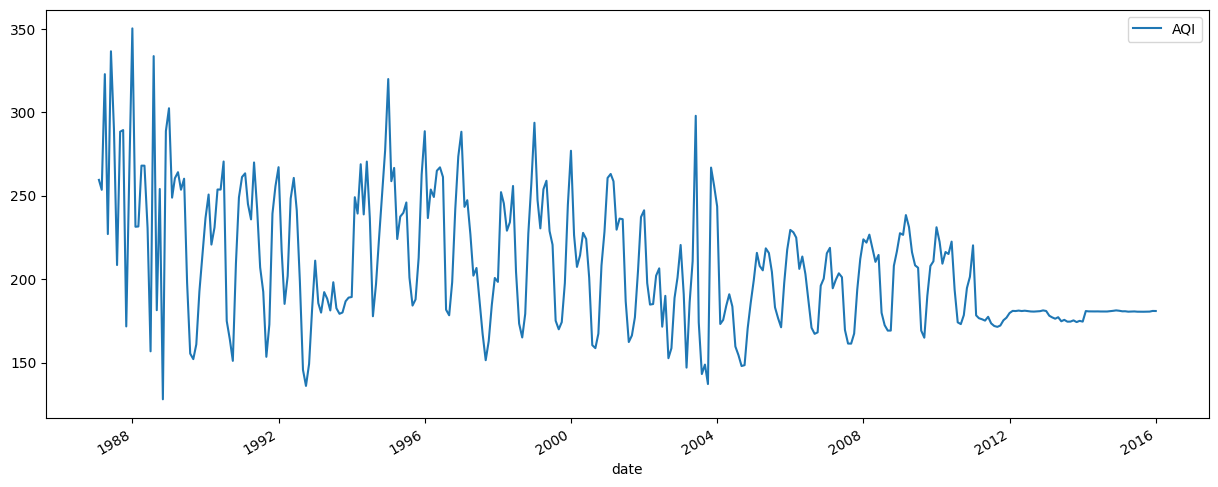

In [39]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

In [42]:
n = df.shape[0]
train_size = 0.8

features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

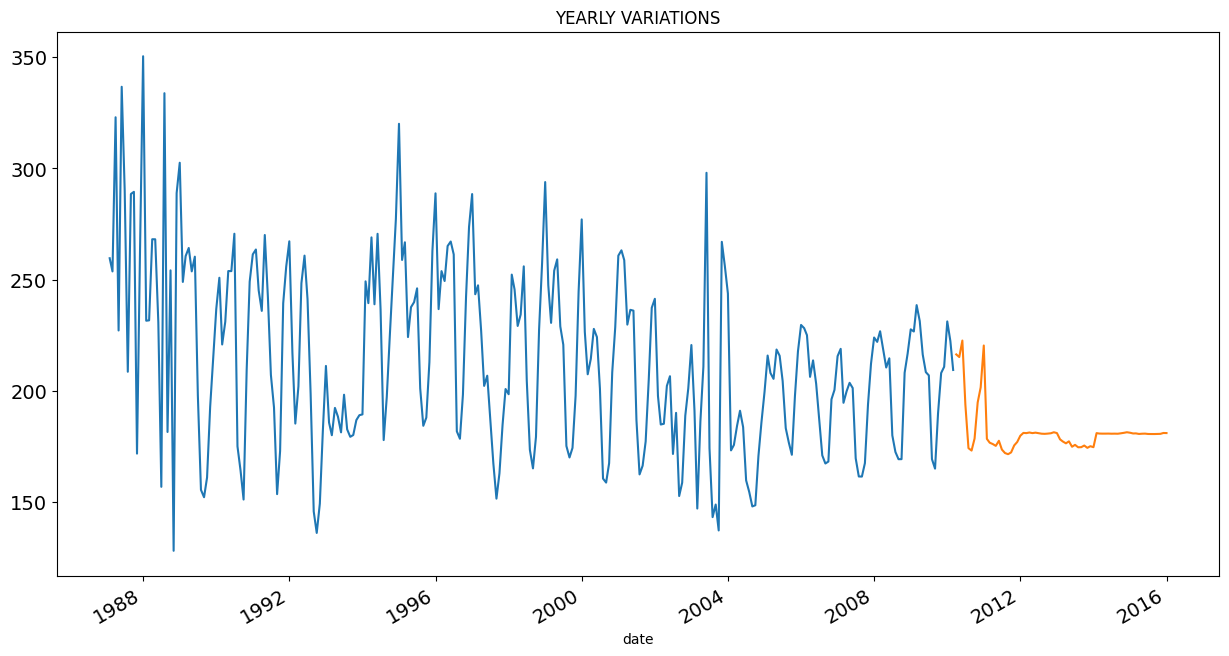

In [43]:
train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

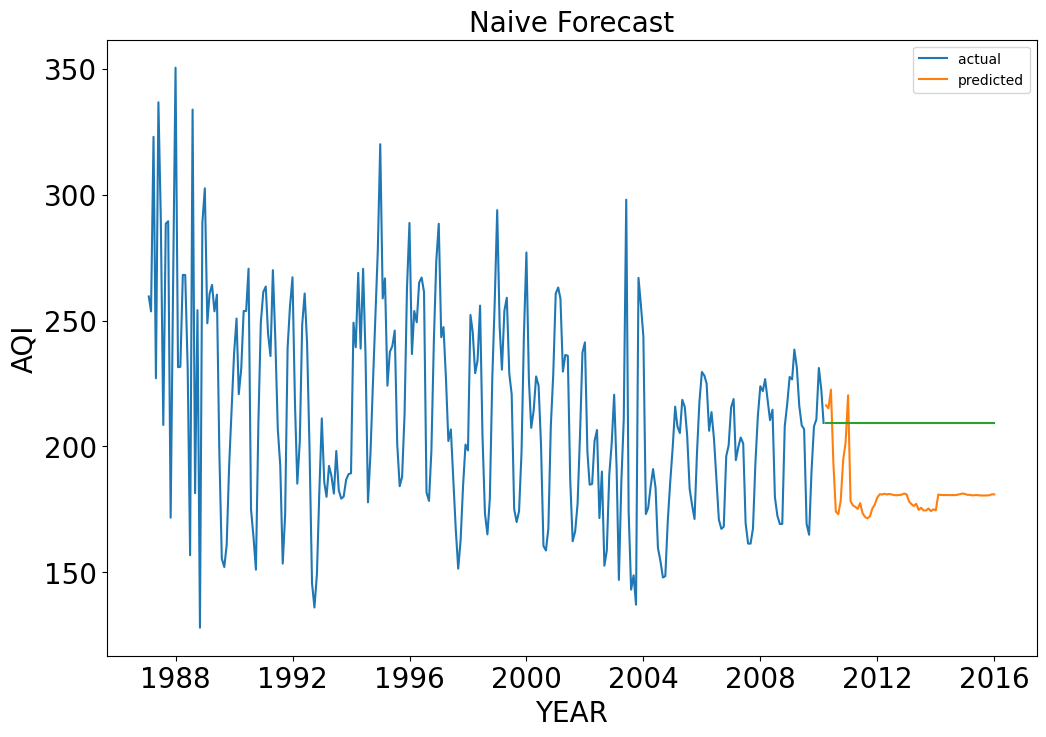

In [44]:
dd= np.asarray(train.AQI)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['AQI'], label='Train')
plt.plot(test.index,test['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=20)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [51]:
df=data[['AQI','date']]

df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()
df.count()

AQI     346
date    346
dtype: int64

In [52]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data=data[['AQI','date','month','year']]
data.head()

,AQI,date,month,year
0,259.563812,1987-01-31,1,1987
1,253.636467,1987-02-28,2,1987
2,322.938366,1987-03-31,3,1987
3,227.085685,1987-04-30,4,1987
4,336.653480,1987-05-31,5,1987


In [53]:
data=data[data['month']==1]
data.head()

,AQI,date,month,year
0,259.563812,1987-01-31,1,1987
12,231.472032,1988-01-31,1,1988
24,248.912114,1989-01-31,1,1989
35,250.787262,1990-01-31,1,1990
47,263.490499,1991-01-31,1,1991


In [54]:
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,29.000000,29.000000
mean,2001.000000,221.689773
std,8.514693,29.932244
min,1987.000000,173.170623
25%,1994.000000,190.997083
50%,2001.000000,226.477290
75%,2008.000000,248.912114
max,2015.000000,263.490499


In [57]:
year=df['year'].values
AQI=df['AQI'].values
df['AQI']=pd.to_numeric(df['AQI'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

<Figure size 2000x1000 with 0 Axes>

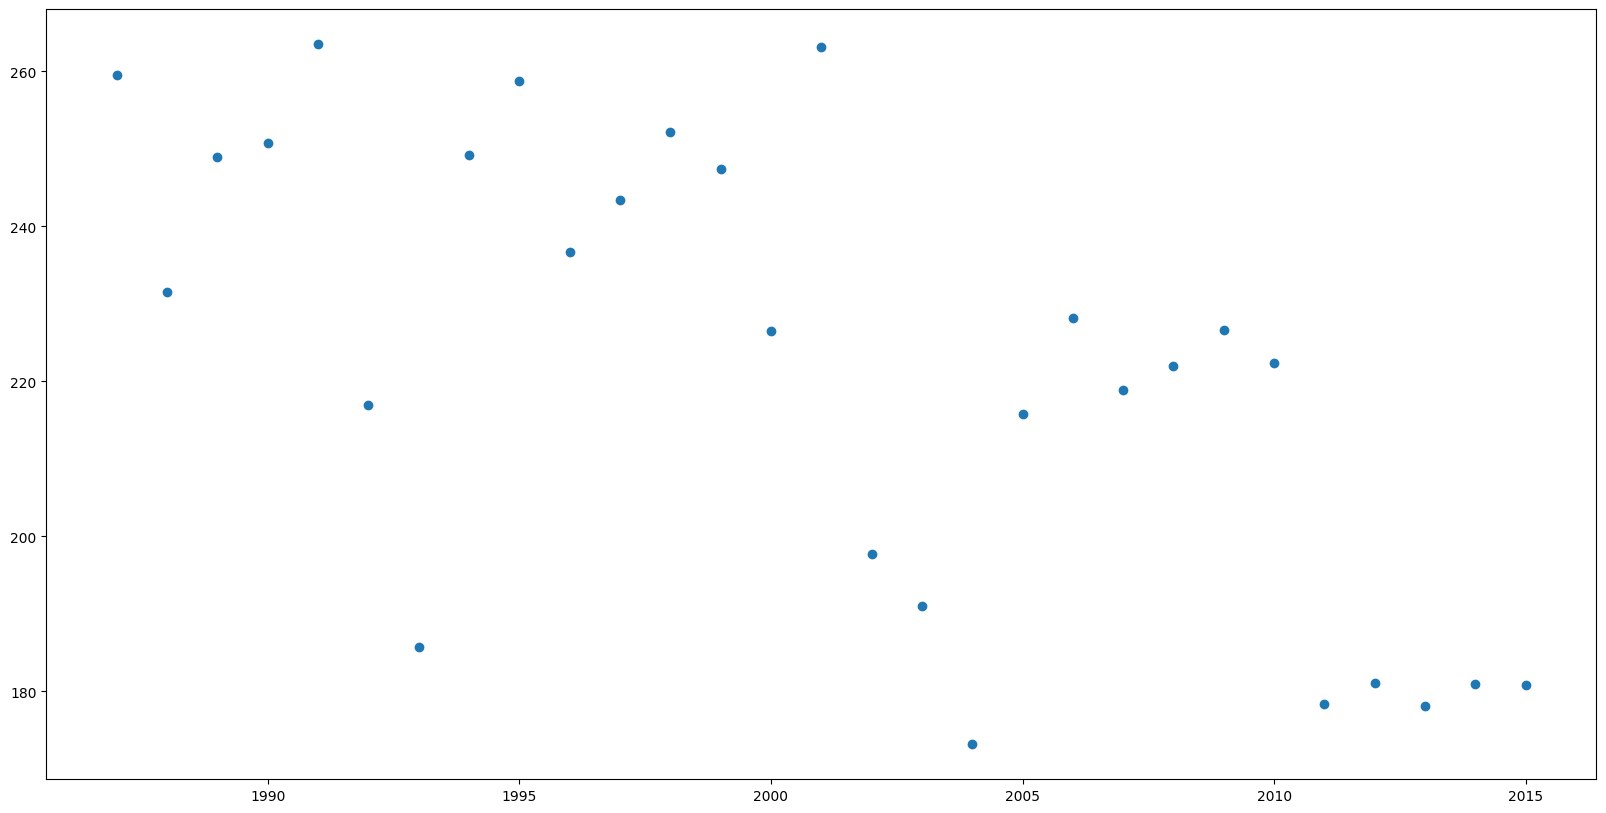

In [58]:
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

In [59]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.64421661],
       [ 1.        ,  1.52677257],
       [ 1.        ,  1.40932853],
       [ 1.        ,  1.29188448],
       [ 1.        ,  1.17444044],
       [ 1.        ,  1.0569964 ],
       [ 1.        ,  0.93955235],
       [ 1.        ,  0.82210831],
       [ 1.        ,  0.70466426],
       [ 1.        ,  0.58722022],
       [ 1.        ,  0.46977618],
       [ 1.        ,  0.35233213],
       [ 1.        ,  0.23488809],
       [ 1.        ,  0.11744404],
       [ 1.        ,  0.        ],
       [ 1.        , -0.11744404],
       [ 1.        , -0.23488809],
       [ 1.        , -0.35233213],
       [ 1.        , -0.46977618],
       [ 1.        , -0.58722022],
       [ 1.        , -0.70466426],
       [ 1.        , -0.82210831],
       [ 1.        , -0.93955235],
       [ 1.        , -1.0569964 ],
       [ 1.        , -1.17444044],
       [ 1.        , -1.29188448],
       [ 1.        , -1.40932853],
       [ 1.        , -1.52677257],
       [ 1.        ,

In [60]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 221.69, -20.19


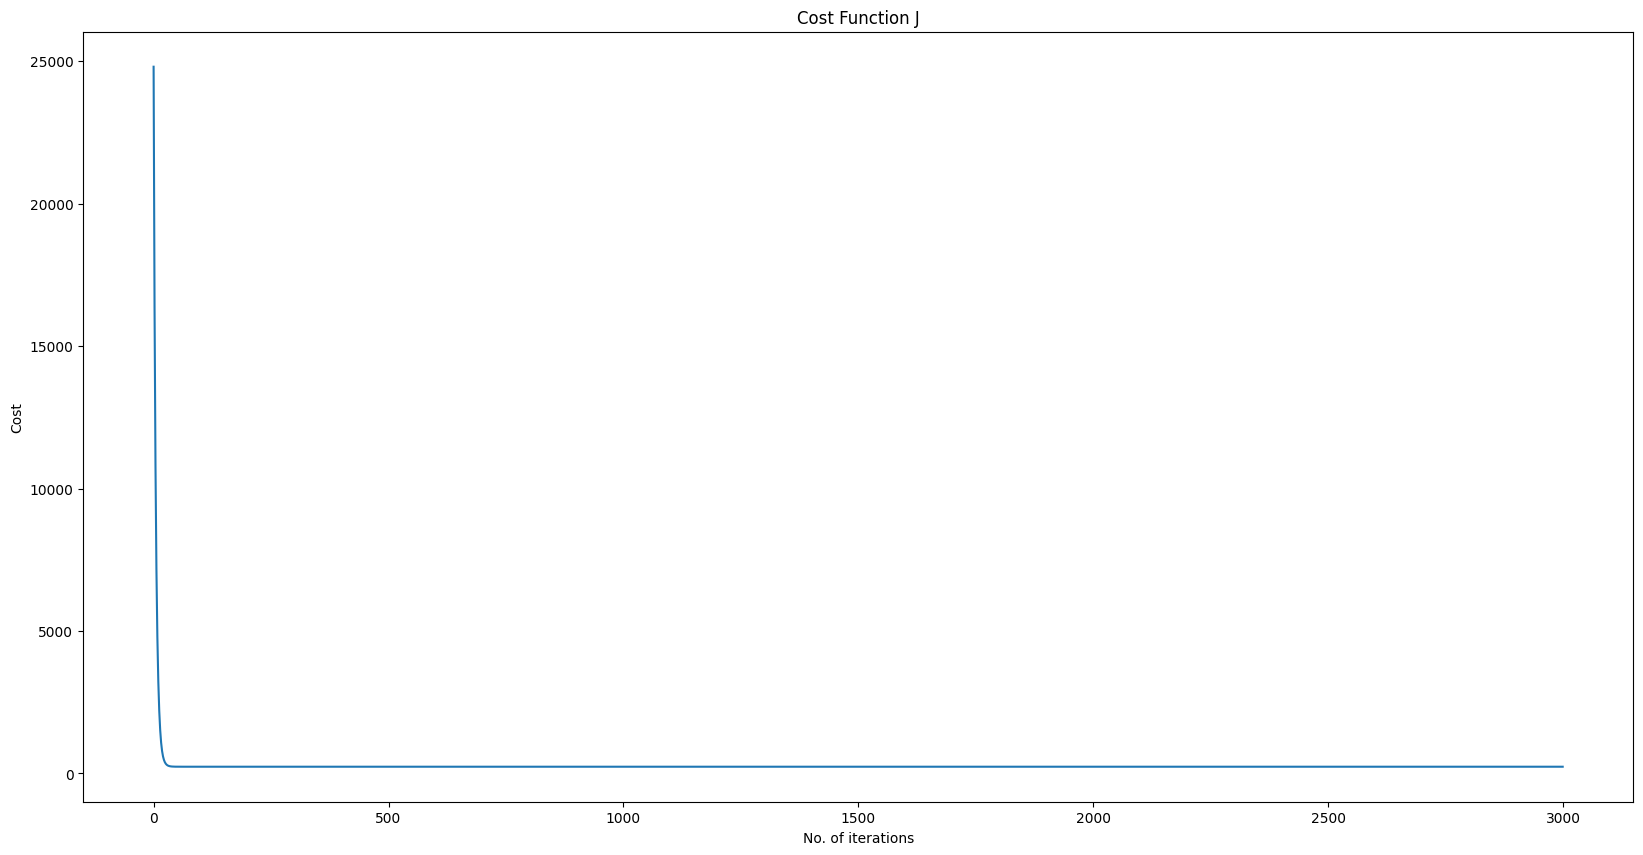

In [61]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [62]:
newB=[221.69, -20.19]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)
x
x

,year,AQI,Actual,Predicted
28,2015,180.782353,180.782353,188.493267
27,2014,180.931495,180.931495,190.864462
26,2013,178.135443,178.135443,193.235657
25,2012,181.034132,181.034132,195.606852
24,2011,178.351111,178.351111,197.978048
23,2010,222.350141,222.350141,200.349243
22,2009,226.624668,226.624668,202.720438
21,2008,221.958625,221.958625,205.091633
20,2007,218.829659,218.829659,207.462829
19,2006,228.127357,228.127357,209.834024


In [64]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

21.708922864594058


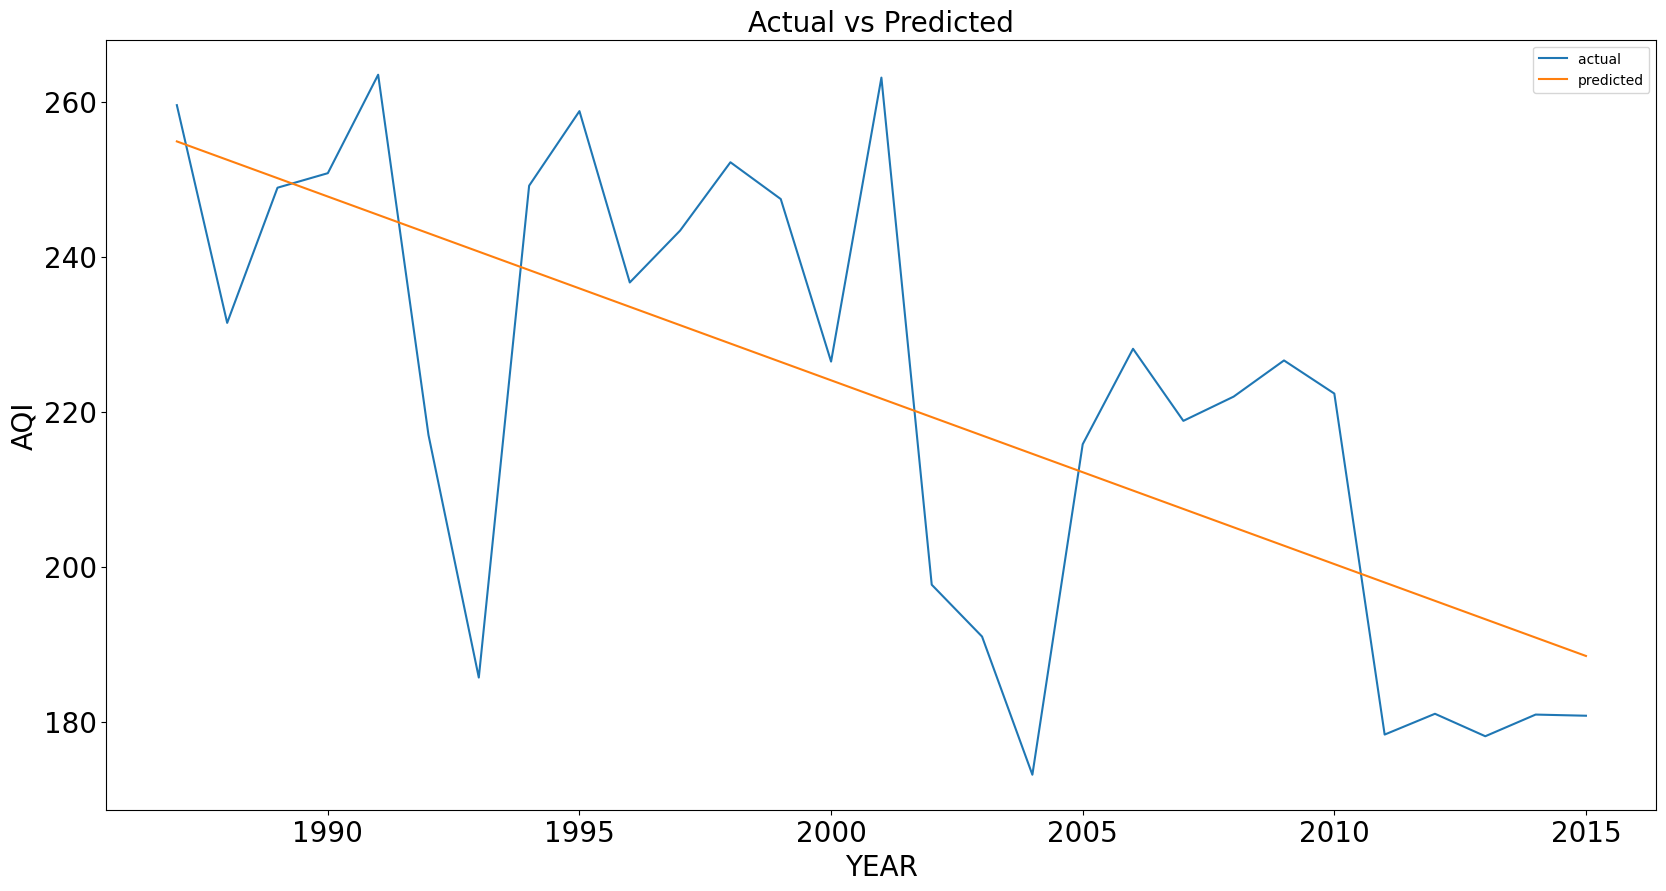

In [65]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("AQI",fontsize=20)
plt.tick_params(labelsize=20)
plt.show()

In [66]:
df=dd[['year','AQI']]


#huge variations aqi accures on year 2009-2010 (by moving average graph)
df=df[df.year<2011]
df.describe()

,year,AQI
count,24.000000,24.000000
mean,1998.500000,230.407037
std,7.071068,25.108258
min,1987.000000,173.170623
25%,1992.750000,218.374232
50%,1998.500000,229.799695
75%,2004.250000,249.575651
max,2010.000000,263.490499
